### Cryptocurrency Portfolio Optimization
*Library for project*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import yfinance as yf
btc_data = yf.download('BTC-USD', start='2018-01-01', end='2024-09-28', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [3]:
df = pd.DataFrame(btc_data)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-23,63643.101562,64733.558594,62628.078125,63329.800781,63329.800781,31400285425
2024-09-24,63326.839844,64695.214844,62737.417969,64301.968750,64301.968750,29938335243
2024-09-25,64302.589844,64804.503906,62945.375000,63143.144531,63143.144531,25078377700
2024-09-26,63138.546875,65790.796875,62669.269531,65181.019531,65181.019531,36873129847
2024-09-27,65180.664062,66480.695312,64852.992188,65790.664062,65790.664062,32058813449


In [5]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [7]:
df.reset_index(inplace=True)
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192


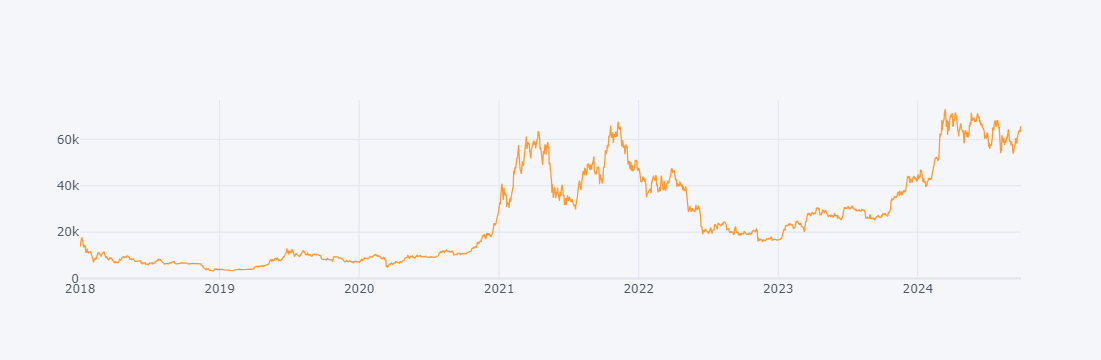

In [8]:
df.iplot(x='Date', y='Close')

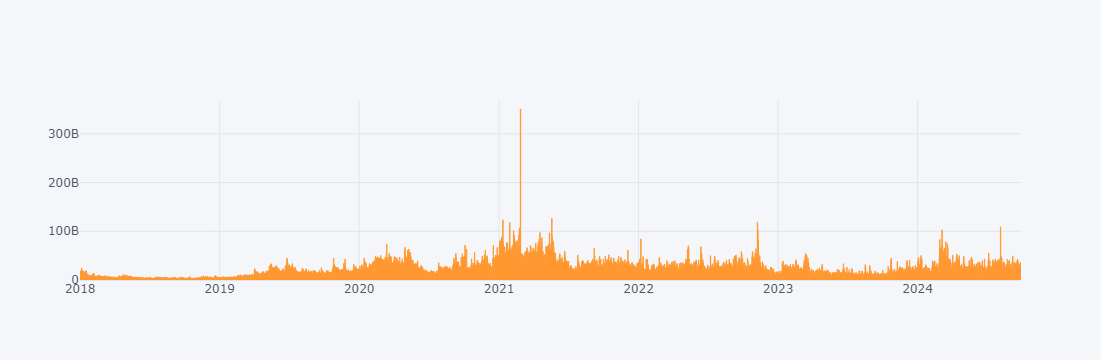

In [10]:
df.iplot(kind='bar',x='Date',y='Volume')

In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [61]:
X = df[['Date','Open','High','Low','Volume']]
y = df['Close']

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scalar_X = MinMaxScaler()
scalar_y = MinMaxScaler()

In [15]:
train_data = scalar_X.fit_transform(X_train)
test_data = scalar_y.fit_transform(y_train.values.reshape(-1,1))

In [17]:
train_data

array([[0.56534366, 0.57671657, 0.56037931, 0.07969547],
       [0.56563981, 0.5619176 , 0.55714581, 0.06405704],
       [0.0056589 , 0.00582336, 0.00644901, 0.00709906],
       ...,
       [0.49022496, 0.50112738, 0.4929537 , 0.18938511],
       [0.40515971, 0.41324931, 0.41703029, 0.04558132],
       [0.09098815, 0.08968046, 0.07743824, 0.17354576]])

In [18]:
test_data

array([[0.58025017],
       [0.55199409],
       [0.00607145],
       ...,
       [0.48905068],
       [0.41459185],
       [0.08012626]])

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

In [21]:
model = Sequential()
model.add(LSTM(128,return_sequences=True,input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dropout(0.2))
model.add(Dense(1))

In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
callback = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
board = TensorBoard(log_dir='logs',histogram_freq=1)

In [25]:
history = model.fit(train_data,test_data,epochs=100,callbacks=[callback,board])

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0748
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0138
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0114
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0096
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0074
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0048
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0038
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0033
Epoch 9/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0031
Epoch 10/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0031
Epoch 11/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0029
Epoch 12/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0027
Epoch 13/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0032
Epoch 14/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0027
Epoch 15/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - lo

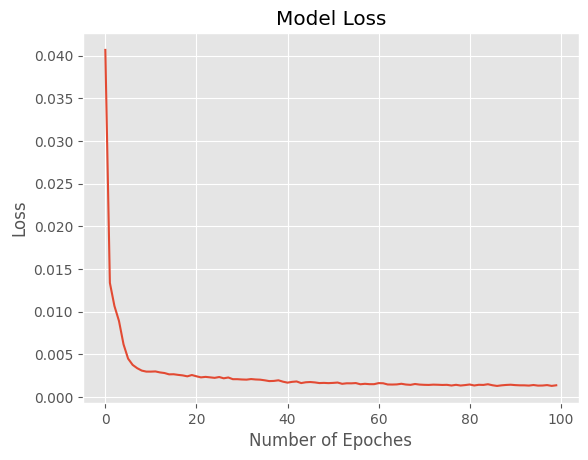

In [26]:
plt.style.use('ggplot')
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Number of Epoches')
plt.ylabel('Loss')
plt.show()

In [27]:
X__pre_test = scalar_X.transform(X_test)
y__pre_test = scalar_y.transform(y_test.values.reshape(-1,1))

In [28]:
y_pred = model.predict(X__pre_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [78]:
y_pred = y_pred.reshape(-1,1)
y_pred_original = scalar_y.inverse_transform(y_pred)

In [79]:
y_pred_original

array([[ 9281.538],
       [ 9524.733],
       [ 9331.149],
       ...,
       [18754.521],
       [18772.408],
       [19570.55 ]], dtype=float32)

In [80]:
import pickle
pickle.dump(scalar_X,open('scalar_X.pkl','wb'))
pickle.dump(scalar_y,open('scalar_y.pkl','wb'))
model.save('model.h5')